# 1D Marginalised Posteriors

This notebook will reproduce the 1D marginalised posterior plots shown in figures 3, 6, 7, and 9 of the paper.

In [ ]:
# Import required libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.lines import Line2D
from bilby.core.result import read_in_result

# Add the path to custom modules to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import custom modules
from config import *

/mnt/lustre/shared_conda/envs/hoyc/igwn-py310-20240725/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Function Initialisation

In [2]:
def posterior_plots(param_list, freqs, params, latex_labels, folder, param_short, unit='', size=(9.7082039325 * 2, 9.7082039325), save_path=None):
    fig, axs = plt.subplots(nrows=len(param_list), ncols=len(params), sharex="col", figsize=size)
    for row_idx, ax_row in enumerate(axs):
        for col_idx, ax in enumerate(ax_row):
            for f in freqs:
                label, current_param = f'f_22_{f}', param_list[row_idx]
                filename = FILE_PATH.format(outdir=folder, param=f"{param_short}_{current_param}", freq=f)
                result = read_in_result(filename)
                inj = result.injection_parameters
                pos = result.posterior
                
                if folder == 'inclination_angle':
                    if params[col_idx] == 'theta_jn':
                        data = pos[params[col_idx]] - inj[params[col_idx]]
                    else:
                        data = pos[params[col_idx]]
                    ax.axvline(0 if params[col_idx] == 'theta_jn' else inj[params[col_idx]], color='k', linewidth=2)
                else:
                    if params[col_idx] == folder:
                        data = pos[params[col_idx]] - inj[params[col_idx]]
                    else:
                        data = pos[params[col_idx]]
                    ax.axvline(0 if params[col_idx] == folder else inj[params[col_idx]], color='k', linewidth=2)
                    

                kde = gaussian_kde(data)
                xs = np.linspace(np.min(data), np.max(data), 100)
                ax.plot(xs, kde(xs), color='k')
                ax.fill_between(xs, np.zeros_like(kde(xs)), kde(xs), alpha=0.3, color=color_map[label])

            ax.spines["right"].set_visible(False)
            ax.spines["top"].set_visible(False)
            ax.spines["left"].set_visible(False)
            ax.set_yticks([])

    for col_idx, ax in enumerate(axs[-1]):
        ax.set_xlabel(latex_labels[col_idx])

    if param_short == "q":
        for row_idx, ax in enumerate(axs[:, 0]):
            ax.set_ylabel(fr"${param_short} = " + "%.2f" % (1. / param_list[row_idx]) + fr"{unit}$", rotation=0, ha='right', va='center')
    elif param_short == 'inc':
        param_new = r'\theta_{\mathrm{JN}}'
        for row_idx, ax in enumerate(axs[:, 0]):
            y_label = fr"${param_new} = "
            if param_list[row_idx] == 0:
                y_label += "0 "
            else:
                y_label += "\pi / {:.0f} ".format(np.pi / np.radians(param_list[row_idx]))
            y_label += fr"{unit}$"
            ax.set_ylabel(y_label, rotation=0, ha='right', va='center')
    else:
        if param_short == 'snr':
            param_new = r'\rho'
        else:
            param_new = param_short
        for row_idx, ax in enumerate(axs[:, 0]):
            ax.set_ylabel(fr"${param_new} = " + str(param_list[row_idx]) + fr"{unit}$", rotation=0, ha='right', va='center')

    handles = [Line2D([], [], color=color_map[k], label=label_map[k]) for k in DICT_KEYS]
    my_kwargs = legend_kwargs.copy()
    my_kwargs['ncol'] = 3
    my_kwargs['loc'] = "upper center"
    fig.legend(handles=handles, **my_kwargs)

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

In [ ]:
path_to_save = '../plots/1d_marginalised_posteriors/' # Path to save the plot
params = ['total_mass', 'mass_ratio', 'a_1', 'a_2', 'theta_jn'] # Parameters to plot on x-axis

## Total Mass

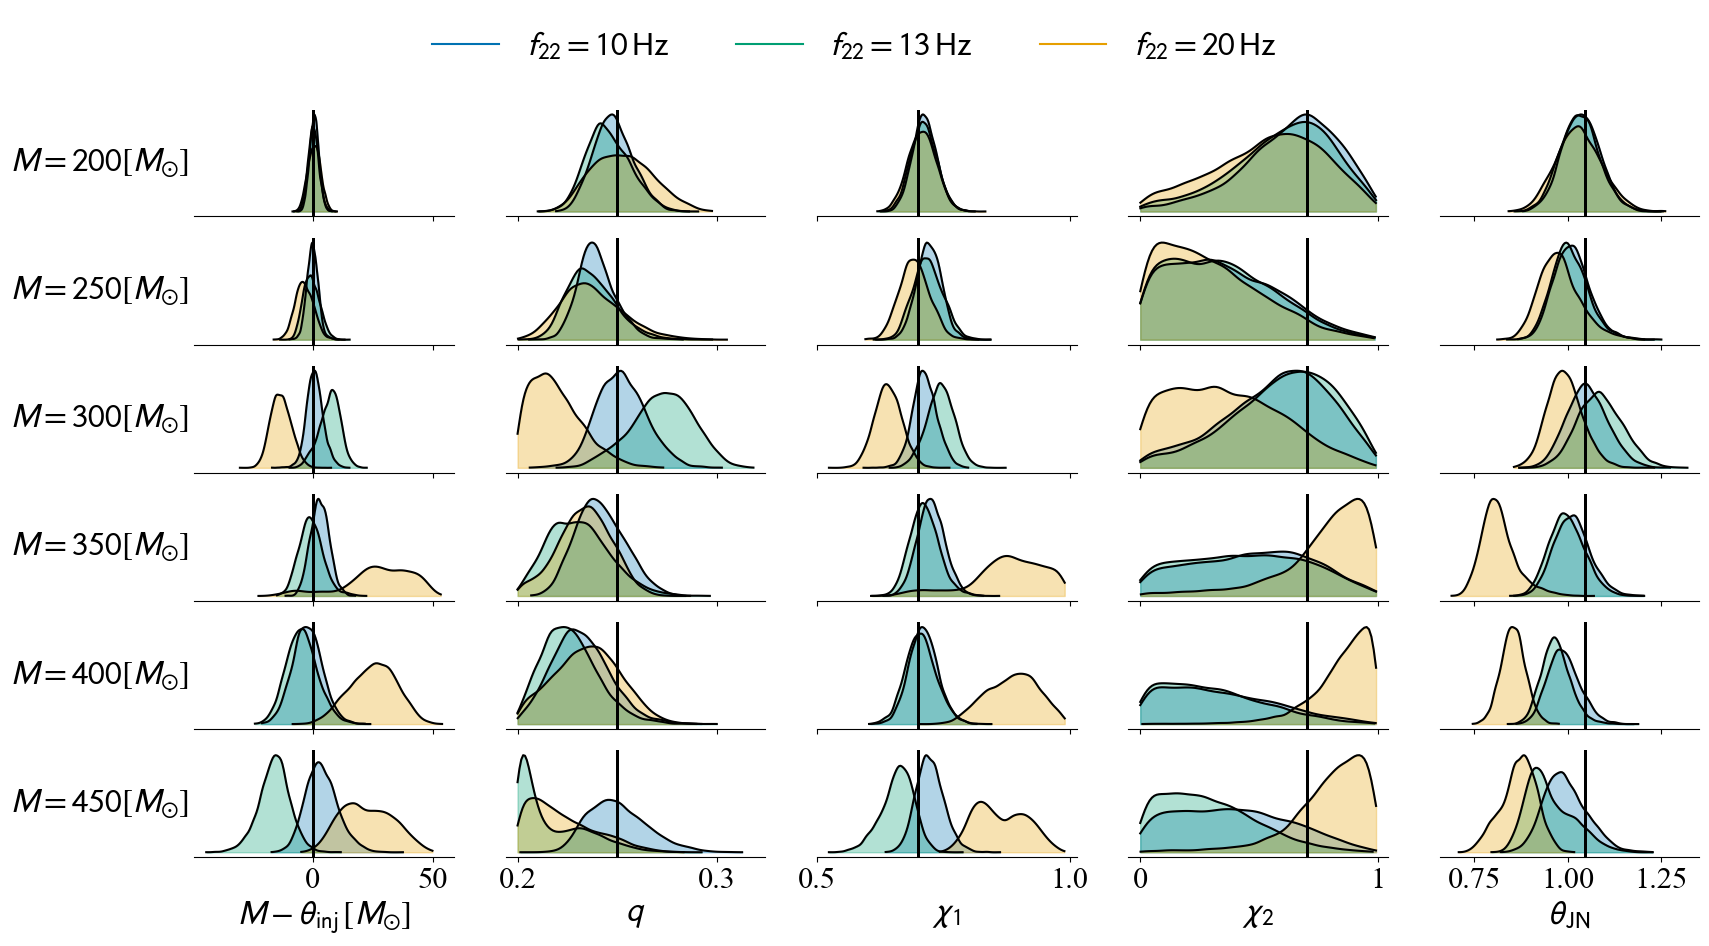

In [4]:
param_list = [200, 250, 300, 350, 400, 450]
outdir = 'total_mass'
label = 'M'
unit = r" [M_{\odot}]"
plot_name = 'total_mass.png'
latex_labels = [r"$M - \theta_{\mathrm{inj}} \, [M_{\odot}]$", r"$q$", r"$\chi_{1}$", r"$\chi_{2}$", r"$\theta_{\mathrm{JN}}$"] # Names for each parameter being shown on the x-axis

posterior_plots(param_list, STARTING_FREQUENCIES, params, latex_labels, outdir, label, unit=unit, save_path=path_to_save + plot_name)

## Mass Ratio

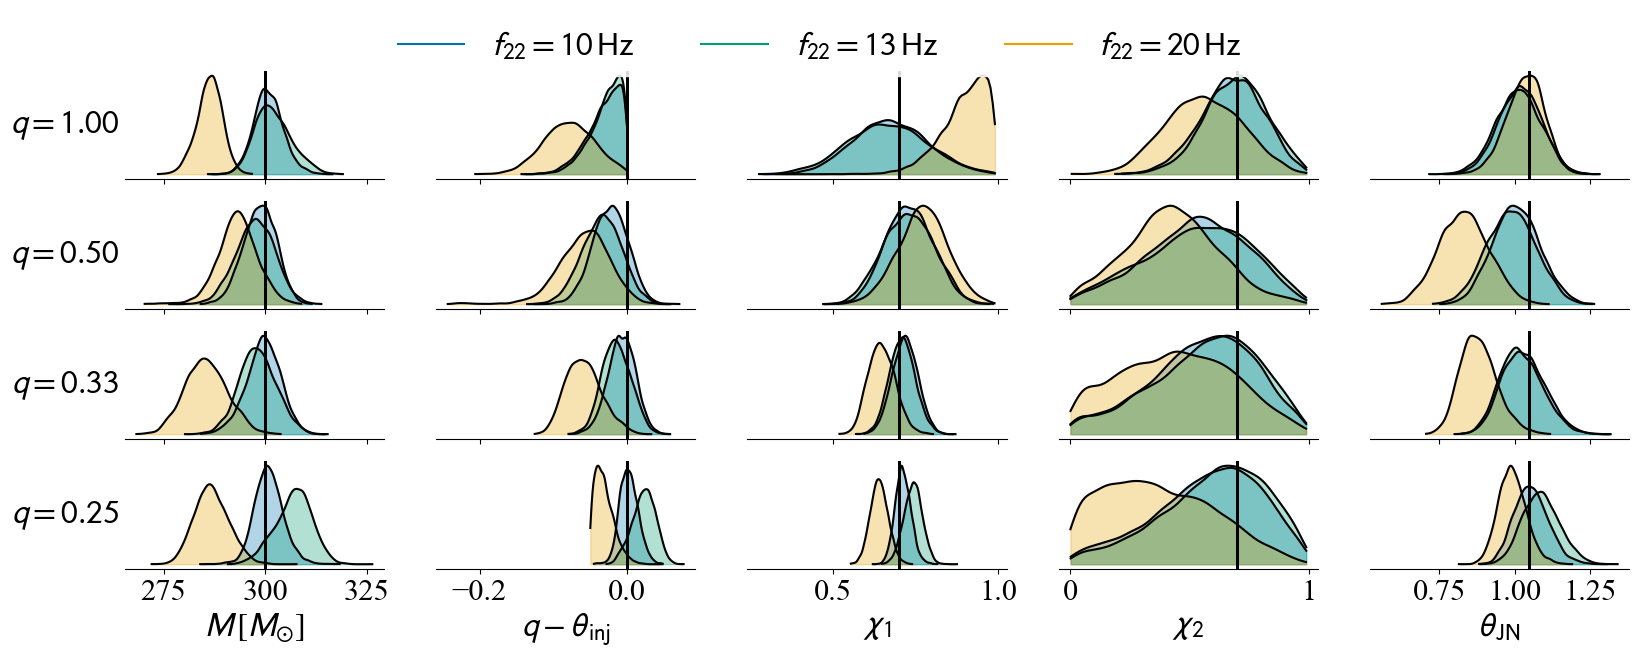

In [5]:
param_list = [1, 2, 3, 4]
outdir = 'mass_ratio'
label = 'q'
plot_name = 'mass_ratio.png'
plot_size = (9.7082039325 * 2, 9.7082039325 / 6. * len(param_list))
latex_labels = [r"$M \, [M_{\odot}]$", r"$q - \theta_{\mathrm{inj}}$", r"$\chi_{1}$", r"$\chi_{2}$", r"$\theta_{\mathrm{JN}}$"] # Names for each parameter being shown on the x-axis

posterior_plots(param_list, STARTING_FREQUENCIES, params, latex_labels, outdir, label, size=plot_size, save_path=path_to_save + plot_name)

## Signal-To-Noise Ratio

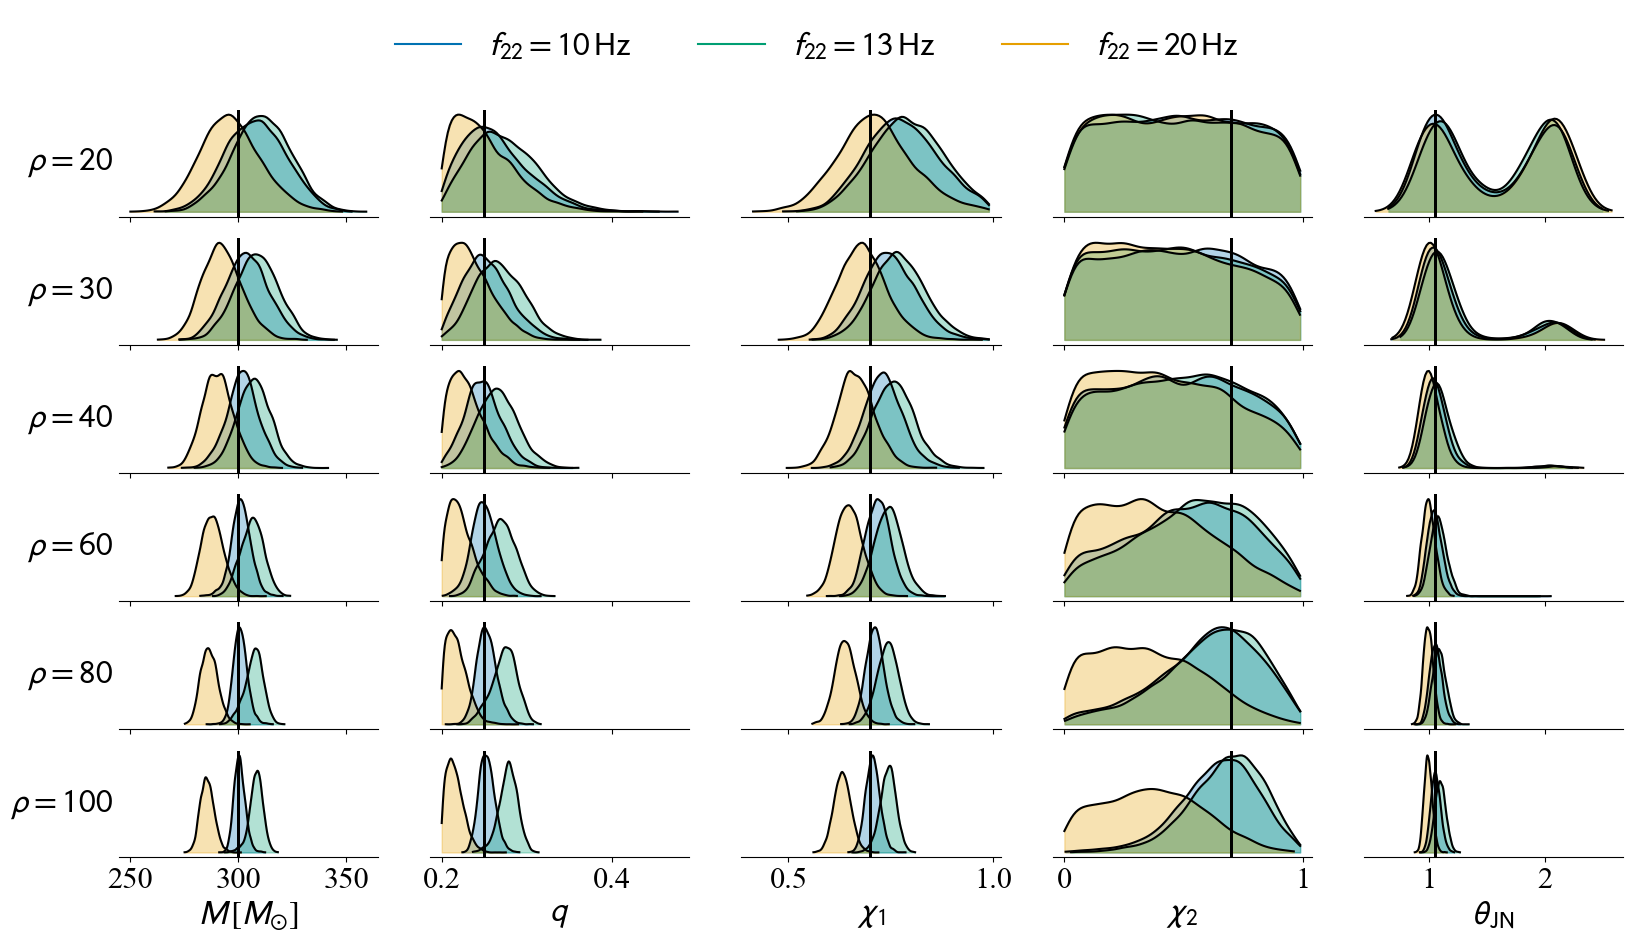

In [6]:
param_list = [20, 30, 40, 60, 80, 100]
outdir = 'snr'
label = 'snr'
plot_name = 'snr.png'
plot_size = (9.7082039325 * 2, 9.7082039325 / 6. * len(param_list))
latex_labels = [r"$M \, [M_{\odot}]$", r"$q$", r"$\chi_{1}$", r"$\chi_{2}$", r"$\theta_{\mathrm{JN}}$"] # Names for each parameter being shown on the x-axis

posterior_plots(param_list, STARTING_FREQUENCIES, params, latex_labels, outdir, label, size=plot_size, save_path=path_to_save + plot_name)

## Inclination Angle

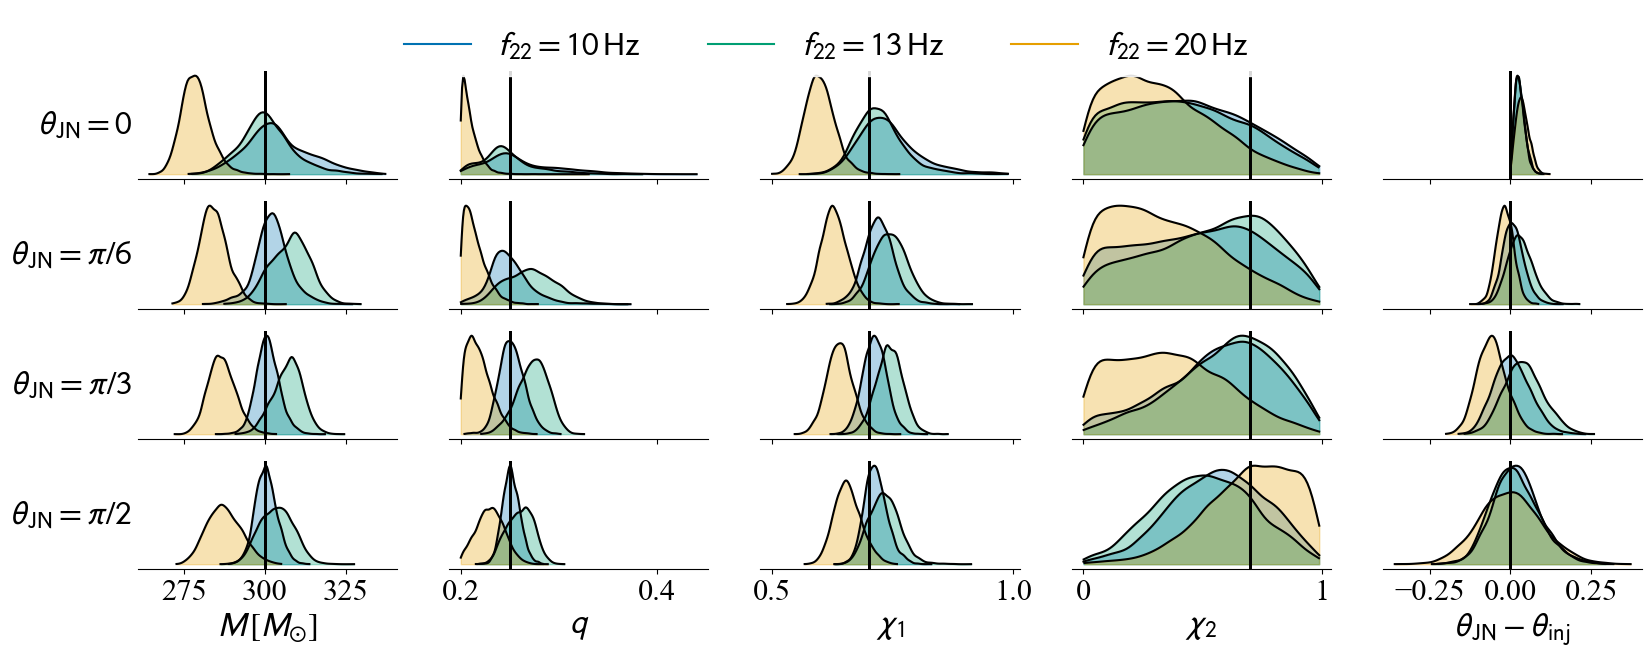

In [7]:
param_list = [0, 30, 60, 90]
outdir = 'inclination_angle'
label = 'inc'
plot_name = 'inclination_angle.png'
plot_size = (9.7082039325 * 2, 9.7082039325 / 6. * len(param_list))
latex_labels = [r"$M \, [M_{\odot}]$", r"$q$", r"$\chi_{1}$", r"$\chi_{2}$", r"$\theta_{\mathrm{JN}} - \theta_{\mathrm{inj}}$"] # Names for each parameter being shown on the x-axis

posterior_plots(param_list, STARTING_FREQUENCIES, params, latex_labels, outdir, label, size=plot_size, save_path=path_to_save + plot_name)